In [3]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install sckit-learn



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement sckit-learn (from versions: none)
ERROR: No matching distribution found for sckit-learn

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need t

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [89]:
# plt.style.use('seaborn')

In [5]:
sns.set(rc={'figure.figsize':(15, 8)})

## Load Datasets

In [6]:
df_banking = pd.read_csv("./banking.csv")

In [7]:
df_banking.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [8]:
df_banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

## Explore & Visualize Data

In [9]:
print('Total rows:', df_banking.shape[0])
print('Total features:', df_banking.shape[1])

Total rows: 41188
Total features: 21


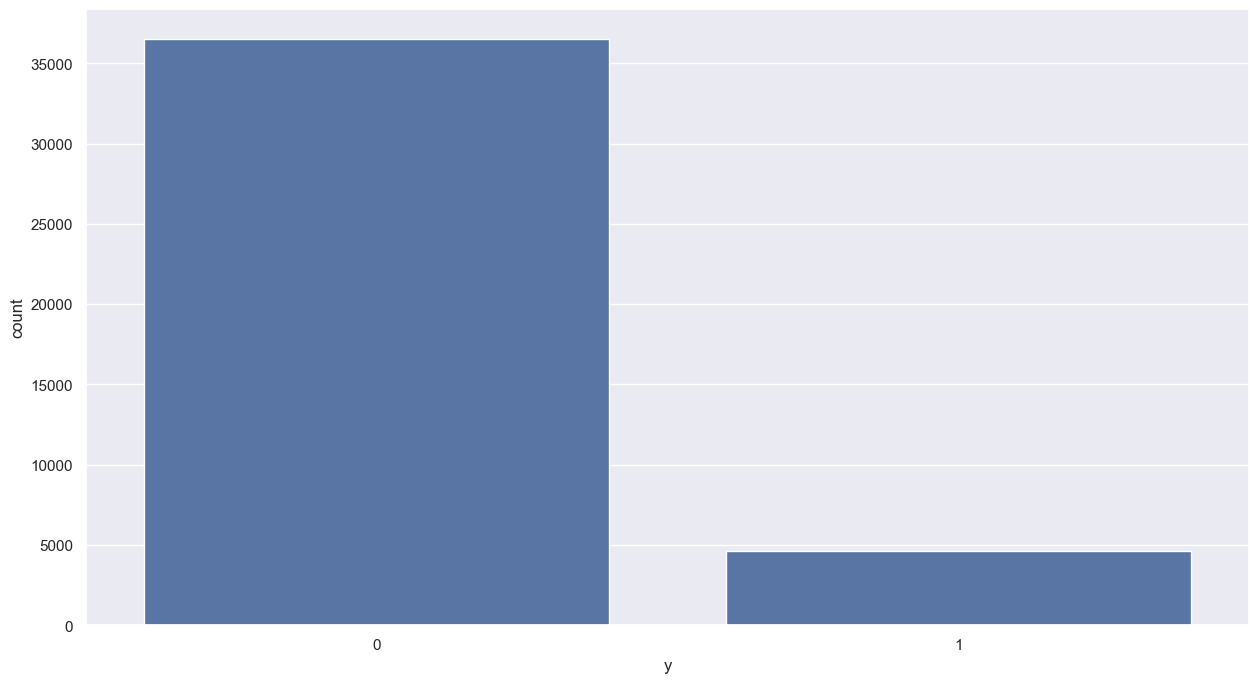

In [10]:
sns.countplot(x='y', data=df_banking)
plt.show()

In [11]:
df_banking['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

#### Check Job Feature

In [12]:
np.unique(df_banking['job'])

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [14]:
df_banking.groupby('job').mean(numeric_only=True)

TypeError: agg function failed [how->mean,dtype->object]

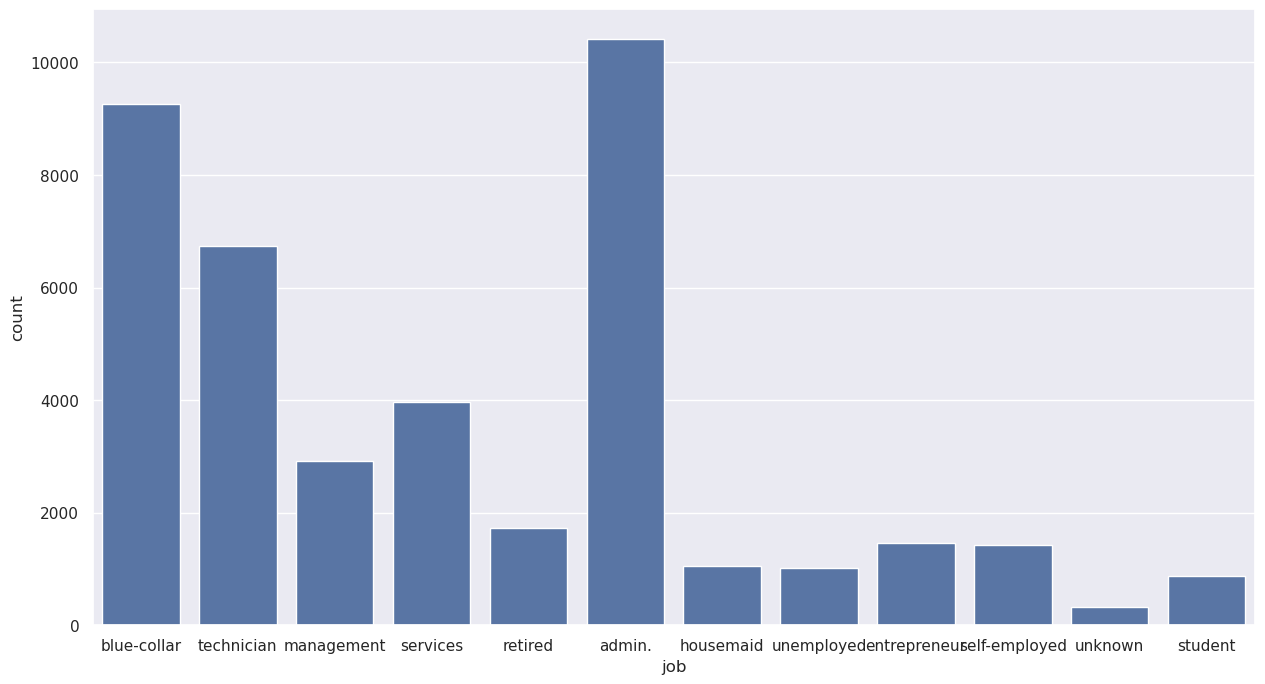

<Figure size 2000x2000 with 0 Axes>

In [99]:
sns.countplot(x='job', data=df_banking)
plt.figure(figsize=(20, 20))
plt.show()

#### Check Marital Feature

In [100]:
np.unique(df_banking['marital'])

array(['divorced', 'married', 'single', 'unknown'], dtype=object)

In [101]:
df_banking.groupby('marital').mean(numeric_only=True)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


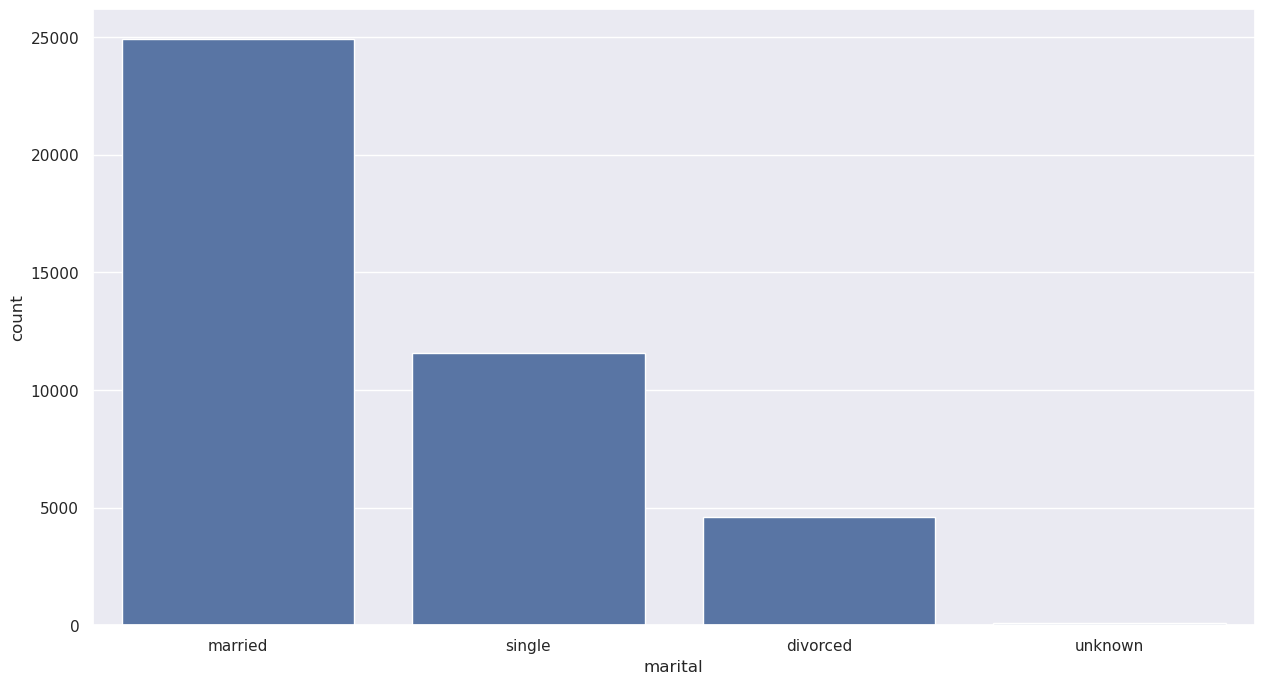

<Figure size 2000x2000 with 0 Axes>

In [102]:
sns.countplot(x='marital', data=df_banking)
plt.figure(figsize=(20, 20))
plt.show()

## Preprocess Data

#### Drop Null Value

In [103]:
df_banking.dropna(inplace=True)

#### Transform Categorical Data

In [104]:
# process categorical data (one-hot-encoding)
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for var in cat_vars:
    cat_list = pd.get_dummies(df_banking[var], prefix=var)
    data1 = df_banking.join(cat_list)
    df_banking = data1

In [105]:
df_banking.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,False,False,False,False,True,False,False,False,True,False
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,False,False,True,False,False,False,False,False,True,False
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,False,False,False,False,True,False,False,False,False,True
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,False,False,True,False,False,False,False,False,True,False
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,False,False,True,False,False,False,False,False,False,True


In [106]:
df_banking.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown',
       'default_yes', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular',
       'contac

In [107]:
# remove categorical data
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data_vars = df_banking.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars] # filter process

In [108]:
df_banking2 = df_banking[to_keep]
df_banking2.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'mo

#### Prepare Features & Labels

In [109]:
# prepare for the columns
data_vars = df_banking2.columns.values.tolist()
y = ['y']
X = [i for i in data_vars if i not in y]

In [110]:
len(X)

63

#### Split Data

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(df_banking2[X], df_banking2[y], test_size=0.3, random_state=0)

In [113]:
X_train.shape

(28831, 63)

In [114]:
X_test.shape

(12357, 63)

## Model Data

In [115]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [116]:
df_banking

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,False,False,False,False,True,False,False,False,True,False
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,False,False,True,False,False,False,False,False,True,False
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,False,False,False,False,True,False,False,False,False,True
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,False,False,True,False,False,False,False,False,True,False
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,False,False,False,False,True,False,False,False,True,False
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,False,False,False,False,True,False,False,False,True,False
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,False,False,False,False,False,False,True,False,True,False
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,True,False,False,False,False,True,False,False,True,False


In [117]:
rf_clf = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=10)


rf_clf

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=1000)

In [118]:
rf_clf.fit(X_train, y_train)

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=1000)

## Test Model

In [119]:
model_score = rf_clf.score(X_train, y_train)
print('Model Accuracy Training:', round(model_score,4))

Model Accuracy Training: 0.925


In [120]:
model_score = rf_clf.score(X_test, y_test)
print('Model Accuracy Testing:', round(model_score,4))

Model Accuracy Testing: 0.9102


In [121]:
# default random forest (n_estimators=100, criterion='gini')
print('Model Accuracy:', round(model_score,4))

Model Accuracy: 0.9102


In [122]:
# n_estimators=100, criterion='entropy'
print('Model Accuracy:', round(model_score,4))

Model Accuracy: 0.9102


In [123]:
# n_estimators=500, criterion='entropy', max_depth=10'
print('Model Accuracy:', round(model_score,4))

Model Accuracy: 0.9102


In [124]:
# n_estimators=10
print('Model Accuracy:', round(model_score,4))

Model Accuracy: 0.9102


## Check Importance Score

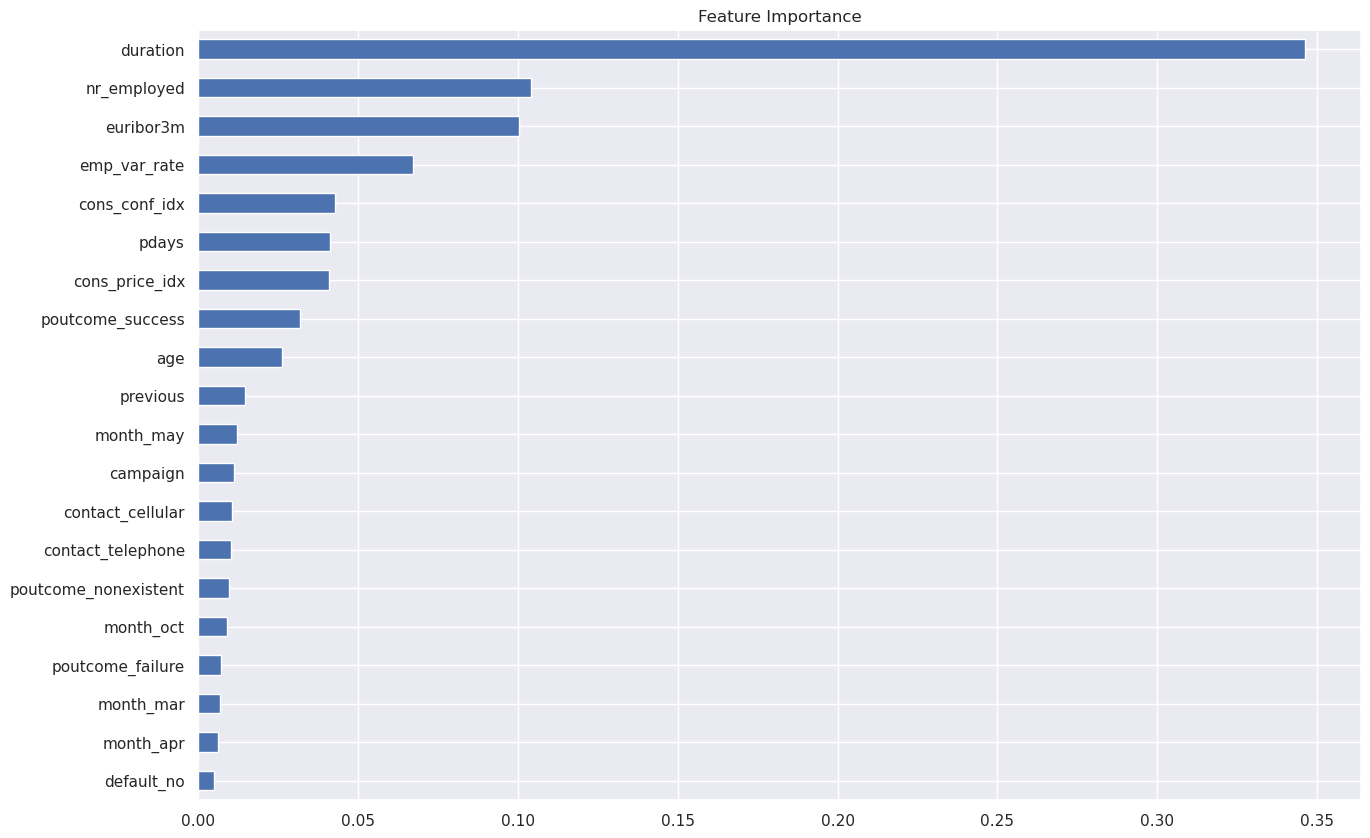

In [125]:
X_ = np.array(X)
importance_scores = rf_clf.feature_importances_
indices = np.argsort(importance_scores)

plt.figure(figsize=(15, 10))
feature_importances = pd.Series(rf_clf.feature_importances_, index=X)
feature_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

## Future Improvements

1. Ask clients to provide more data
2. Augment data using oversampling or undersampling technique
3. Tune hyper-parameters of Random Forest
4. Implement ROC-AUC technique

## Display The Tree

In [126]:
from sklearn.tree import export_graphviz

In [127]:
estimator = rf_clf.estimators_[0] # choose only 1 decision tree

In [130]:
export_graphviz(estimator, rounded=True, proportion=False, out_file='tree.dot',
                feature_names=X_train.columns, precision=2, filled=True)

In [131]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=1000'])

from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'dot'

---